<a href="https://colab.research.google.com/github/DimosthenisDimoulias/datastories_for_emme/blob/main/users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving deliberation_comments_104.xlsx to deliberation_comments_104 (3).xlsx
Refined Counts:
User_Category_Refined
Επώνυμοι Πολίτες     419
Ανώνυμοι             192
Συλλογικοί Φορείς     36
Name: count, dtype: int64

Sample Anonymous (Refined):
['Ιωαννα Ψ', 'Basiliy', 'ΧΑΡΑΛΑΜΠΟΣ Α', 'ΚΑΤΕΡΙΝΑ Γ', 'σοφια λ', 'Σωτηρια', 'Σωτηρια', 'ΚΑΤΕΡΙΝΑ Γ', 'ΚΑΤΕΡΙΝΑ Γ', 'κων', 'Β.Κολοβου', 'Παντελής Π', 'Jorji', 'Γιώργος', 'Αναγνώστης']

Sample Named (Refined):
['ΚΑΤΕΡΙΝΑ ΜΑΝΟΥΣΑΚΗ', 'Βασίλης Π.', 'Κερεστετζής Βασίλειος', 'Γούργουλης Βασίλης', 'Αναστασία Λάμπρου']


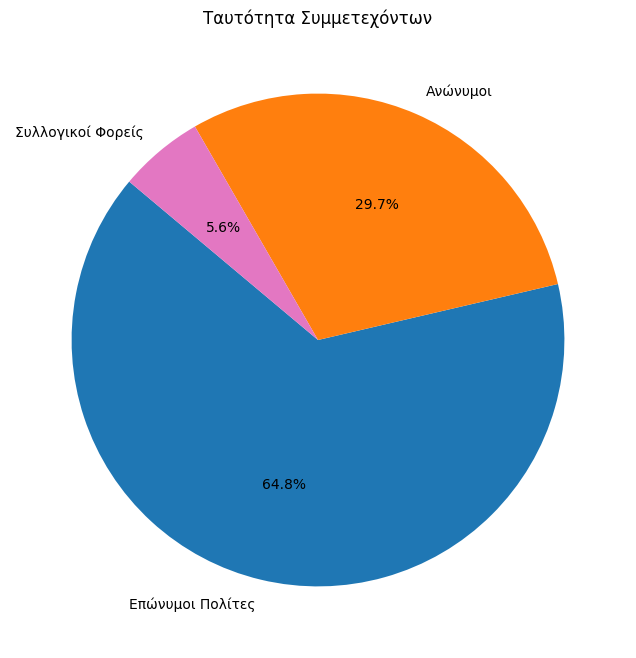

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataframe
uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0])

df['Σχολιαστής_clean'] = df['Σχολιαστής'].astype(str).str.strip()

# Keywords for Collective Bodies
collective_keywords = ['σύλλογος', 'ένωση', 'ομοσπονδία', 'σωματείο', 'πανεπιστήμιο', 'τμήμα', 'συνέλευση', 'φοιτητές', 'πρυτανεία', 'σύγκλητος', 'επιτροπή', 'φορέας', 'ομάδα', 'συμβούλιο', 'δεπ', 'εδιπ', 'ετεπ', 'σύλλογοι']
collective_pattern = '|'.join(collective_keywords)

def classify_user_refined(name):
    # Normalize
    name_lower = name.lower()

    # 1. Collective Bodies
    if re.search(collective_pattern, name_lower):
        return 'Συλλογικοί Φορείς'

    # 2. Explicit Anonymous (Keywords)
    if 'ανώνυμος' in name_lower or 'anonymous' in name_lower:
        return 'Ανώνυμοι'

    # 3. Structural Analysis
    # Check for presence of Greek characters. If none, assume Pseudonym/Latin -> Anonymous
    if not re.search('[α-ωΑ-Ω]', name):
        return 'Ανώνυμοι'

    parts = name.split()

    # Check word count. Needs at least 2 parts (First + Last)
    if len(parts) < 2:
        return 'Ανώνυμοι'

    # Check for single-letter parts (Initial without dot, e.g., "σοφια λ")
    # We treat "Λ." (2 chars) as acceptable for a name (e.g. George L.), but "Λ" (1 char) as likely hiding the name.
    # However, user example "σοφια λ" (with space, presumably) -> Anonymous.
    for part in parts:
        if len(part) == 1:
            return 'Ανώνυμοι'

    # If it passes checks, it's a Named Citizen
    return 'Επώνυμοι Πολίτες'

# Apply classification
df['User_Category_Refined'] = df['Σχολιαστής_clean'].apply(classify_user_refined)

# Calculate counts
counts_refined = df['User_Category_Refined'].value_counts()

# Plotting
colors = ['#55a868', '#c44e52', '#8172b3'] # Green (Named), Red (Collective), Purple (Anon) - order depends on counts
# Let's map colors to indices to be sure
color_map = {'Επώνυμοι Πολίτες': '#1f77b4', 'Ανώνυμοι': '#ff7f0e', 'Συλλογικοί Φορείς': '#e377c2'}
plot_colors = [color_map.get(x, '#333333') for x in counts_refined.index]

plt.figure(figsize=(8, 8))
plt.pie(counts_refined, labels=counts_refined.index, autopct='%1.1f%%', startangle=140, colors=plot_colors)
plt.title('Ταυτότητα Συμμετεχόντων')
plt.savefig('user_profile_refined.png')

# Output for text generation
print("Refined Counts:")
print(counts_refined)
print("\nSample Anonymous (Refined):")
print(df[df['User_Category_Refined']=='Ανώνυμοι']['Σχολιαστής_clean'].head(15).tolist())
print("\nSample Named (Refined):")
print(df[df['User_Category_Refined']=='Επώνυμοι Πολίτες']['Σχολιαστής_clean'].head(5).tolist())